# TOTALITY CORP ASSIGNMENT

In [1]:
#importing basic libraries
import os
import pandas as pd
import numpy as np

In [2]:
#path to the folder

In [3]:
cd C:\Users\admin\cat-breeds-dataset

C:\Users\admin\cat-breeds-dataset


In [4]:
cd C:\Users\admin\cat-breeds-dataset\images

C:\Users\admin\cat-breeds-dataset\images


In [5]:
#Creating list of breed on which classifer to be trained.
list1 =['Bombay', 'Calico', 'Burmese', 'Himalayan', 'Munchkin', 'Ragdoll', 'Siberian', 'British Shorthair', 'Russian Blue', 'Dilute Calico']
list1

['Bombay',
 'Calico',
 'Burmese',
 'Himalayan',
 'Munchkin',
 'Ragdoll',
 'Siberian',
 'British Shorthair',
 'Russian Blue',
 'Dilute Calico']

In [6]:
import os 
import shutil

location = "C:/Users/admin/cat-breeds-dataset/images"

#Selecting only required folders
for file in os.listdir(location):
     if file in list1:
       print("Breed to be trained -",file)
     else:
       print(file)
       path = os.path.join(location, file) 
       shutil.rmtree(path)

Breed to be trained - Bombay
Breed to be trained - British Shorthair
Breed to be trained - Burmese
Breed to be trained - Calico
cat_classification
Breed to be trained - Dilute Calico
Breed to be trained - Himalayan
Breed to be trained - Munchkin
Breed to be trained - Ragdoll
Breed to be trained - Russian Blue
Breed to be trained - Siberian


In [7]:
#!pip install split_folders

In [8]:
import splitfolders

In [9]:
#Splits images into train and test datasets
splitfolders.ratio(location, output="C:/Users/admin/cat-breeds-dataset/images/cat_classification", seed=1337, ratio=(.8, 0,0.2))

Copying files: 15654 files [00:37, 420.24 files/s]


In [10]:
# import the libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [11]:
# re-size all the images
IMAGE_SIZE = [230, 230]

train_path = 'C:/Users/admin/cat-breeds-dataset/images/cat_classification/train'
test_path = 'C:/Users/admin/cat-breeds-dataset/images/cat_classification/test'

#INCEPTION

In [12]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [13]:
for layer in inception.layers:
    layer.trainable = False

In [14]:
#path for output
folders = glob('C:/Users/admin/cat-breeds-dataset/images/cat_classification/train/*')

In [15]:
#Flattening 
x = Flatten()(inception.output)

In [16]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 230, 230, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 114, 114, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 114, 114, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 114, 114, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#ImageDataGenerator

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
training_set = train_datagen.flow_from_directory(train_path,target_size = (224, 224),batch_size = 64,class_mode = 'categorical')

Found 12520 images belonging to 10 classes.


In [22]:
test_set = test_datagen.flow_from_directory(test_path,target_size = (224, 224),batch_size = 64,class_mode = 'categorical')

Found 3134 images belonging to 10 classes.


In [23]:
r = model.fit_generator(training_set,validation_data=test_set,epochs=10,steps_per_epoch=len(training_set),validation_steps=len(test_set))

C:\Users\admin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
196/196 [==============================] - 1804s 9s/step - loss: 7.4009 - accuracy: 0.4508 - val_loss: 4.2383 - val_accuracy: 0.4911
Epoch 2/10
196/196 [==============================] - 1851s 9s/step - loss: 3.2252 - accuracy: 0.5972 - val_loss: 4.0941 - val_accuracy: 0.6088
Epoch 3/10
196/196 [==============================] - 1598s 8s/step - loss: 2.9947 - accuracy: 0.6359 - val_loss: 3.7056 - val_accuracy: 0.5960
Epoch 4/10
196/196 [==============================] - 1502s 8s/step - loss: 2.6708 - accuracy: 0.6661 - val_loss: 6.3899 - val_accuracy: 0.5424
Epoch 5/10
196/196 [==============================] - 1531s 8s/step - loss: 3.2669 - accuracy: 0.6611 - val_loss: 4.9072 - val_accuracy: 0.5705
Epoch 6/10
196/196 [==============================] - 1649s 8s/step - loss: 2.6246 - accuracy: 0.6917 - val_loss: 4.4724 - val_accuracy: 0.6206
Epoch 7/10
196/196 [==============================] - 1679s 9s/step - loss: 2.5830 - accuracy: 0.7044 - val_loss: 4.4214 - val_accuracy:

In [24]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [25]:
#saving model in .h5 format file
model.save('model.h5')

In [43]:
y_pred = model.predict(test_set)

In [44]:
y_pred = np.argmax(y_pred, axis=1)

In [45]:
y_pred

array([3, 7, 4, ..., 0, 7, 5], dtype=int64)

In [46]:
model=load_model('model.h5')

In [47]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 230, 230, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 114, 114, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 114, 114, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 114, 114, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [48]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [49]:
test_set = test_datagen.flow_from_directory('C:/Users/admin/cat-breeds-dataset/images/cat_classification/test',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')

Found 3134 images belonging to 10 classes.


In [50]:
test_y=test_set.labels

In [51]:
y_pred = model.predict(test_set)

In [52]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [53]:
print(len(test_y))
print(len(y_pred))

3134
3134


#Confusion matrix

In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y, y_pred)

<AxesSubplot:>

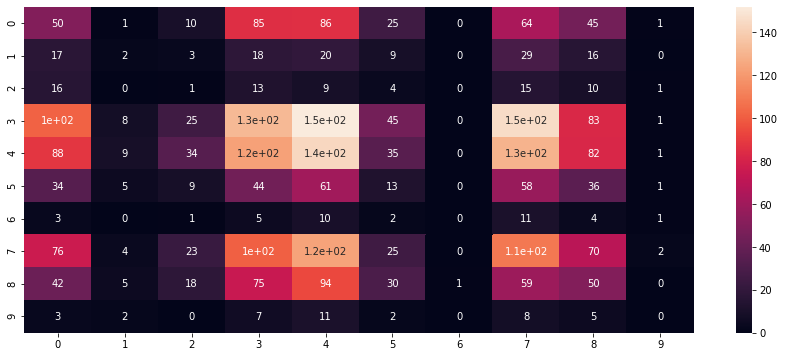

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(cm, annot=True)

#Accuracy

In [56]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, y_pred)
accuracy

0.15985960433950222

#F1 score

In [57]:
from sklearn.metrics import f1_score
f1_score(test_y, y_pred, average='macro')

0.09522503420426828